In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import sys
sys.path.append('/home/diego/Trabajo/Proyectos/Pynterpred_devel/')
import numpy as np
import mdtraj
import pynterpred as pnt
import nglview
import tqdm
import matplotlib.pyplot as plt

from simtk import openmm, unit
from simtk.openmm import app

In [3]:
receptor = pnt.Receptor('testsystems/Barnase-Barstar/pdbs/Barnase.pdb','amber14-all.xml',pH=7.0)
ligand   = pnt.Ligand('testsystems/Barnase-Barstar/pdbs/Barstar.pdb','amber14-all.xml',pH=7.0)

In [4]:
context=pnt.MMContext(receptor,ligand)

In [24]:
context.center_ligand([10000.0,0,0]*unit.nanometers)
energy_far=context.get_potential_energy()
print(energy_far)

7235.6826171875 kJ/mol


In [6]:
region = pnt.Region()

In [7]:
region.centers_in_layer("regular_cartesian",receptor,ligand,delta_x=0.25) #delta_x=0.25

In [8]:
region.rotators_in_quaternions_region(nside=8) #nside=8

In [31]:
#for qrotor in tqdm(region.qrotors):
#    for center in tqdm(region.centers):
#        context.make_conformation(center*unit.nanometer,qrotor)
#        context.get_potential_energy()

energies_centers=[]
qrotor=region.qrotors[0]
for center in tqdm.tqdm_notebook(region.centers):
    context.make_conformation(center*unit.nanometer,qrotor)
    energies_centers.append(context.get_potential_energy()._value)
    

/home/diego/Myopt/Miniconda/miniconda3/envs/pynterpred/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


<IPython.core.display.Javascript object>


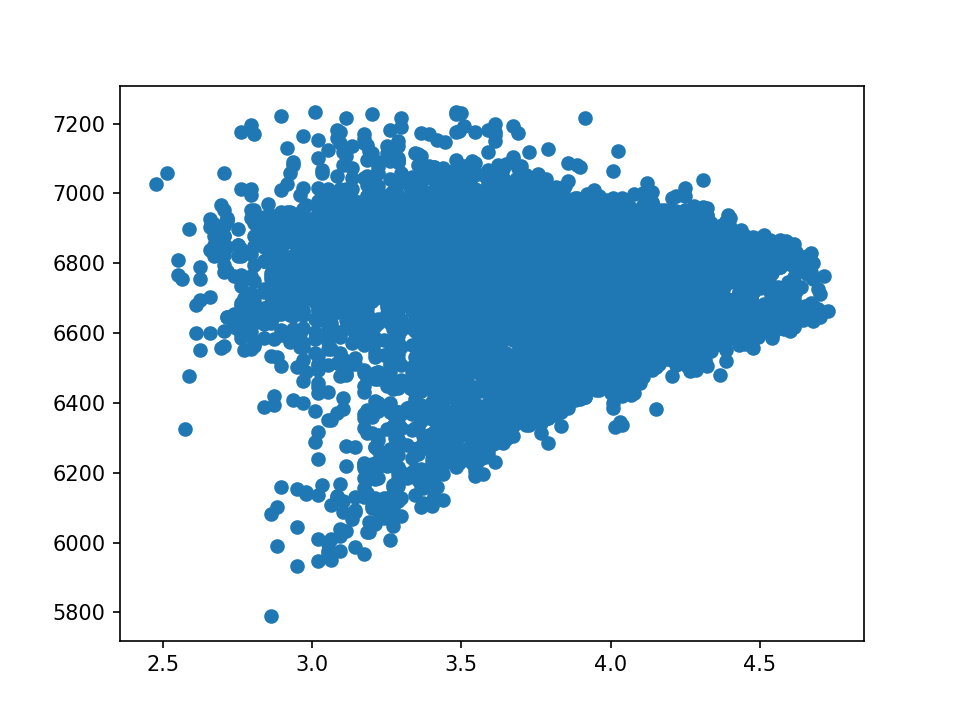

In [32]:
energies_centers=np.array(energies_centers)
mask = energies_centers < energy_far._value
view_centers=region.centers[mask]
view_distance_centers=np.linalg.norm(view_centers,axis=1)
view_energies_centers=energies_centers[mask]

plt.scatter(view_distance_centers,view_energies_centers)

In [33]:
topol=mdtraj.Topology.from_openmm(receptor.topology)
chain=topol.add_chain()
for ii in range(len(view_centers)):
    residue=topol.add_residue('XXX',chain)
    atom=topol.add_atom('C',mdtraj.element.Element,residue)
    atom.element.symbol='C'
    atom.element.radius=0.5

posit = np.vstack((receptor.positions._value,view_centers))

aux_traj=mdtraj.Trajectory(posit, topol)

colors=pnt.utils.colorscale2hex(view_energies_centers)

view=nglview.show_mdtraj(aux_traj)
view.clear()
view.add_ball_and_stick('XXX')
view.add_cartoon('protein',color='purple')
view.add_surface('protein',color='orange',opacity=0.1)
view._set_color_by_residue(colors,component_index=0)
view

NGLWidget()

In [34]:
mask = np.array(energies_centers) < 6200.0
view_centers=region.centers[mask]
view_distance_centers=np.linalg.norm(view_centers,axis=1)
view_energies_centers=energies_centers[mask]

topol=mdtraj.Topology.from_openmm(receptor.topology)
chain=topol.add_chain()
for ii in range(len(view_centers)):
    residue=topol.add_residue('XXX',chain)
    atom=topol.add_atom('C',mdtraj.element.Element,residue)
    atom.element.symbol='C'
    atom.element.radius=0.5

posit = np.vstack((receptor.positions._value,view_centers))

aux_traj=mdtraj.Trajectory(posit, topol)

colors=pnt.utils.colorscale2hex(view_energies_centers)

view=nglview.show_mdtraj(aux_traj)
view.clear()
view.add_ball_and_stick('XXX')
view.add_cartoon('protein',color='purple')
view.add_surface('protein',color='orange',opacity=0.1)
view._set_color_by_residue(colors,component_index=0)
view

NGLWidget()